# Sampling

we sample from chemical graphs.

First we will fit a sampler and then we will generate new graphs :)


## initialising logging and notebook

In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)
!date
BABELDRAW=False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Wed May  4 03:07:17 KST 2016


## fit sampler i.e. fit estimator and grammar

In [13]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

dataset_fname = 'toolsdata/bursi.pos.gspan'

In [14]:
%%time
'''
TRAINING A SAMPLER
'''
from graphlearn.graphlearn import  Sampler
from eden.graph import Vectorizer

# to demonstrate pluggable regressor
#from graphlearn.estimate import OneClassEstimator
#from sklearn.linear_model import LinearRegression 

# get training graphs
training_graphs = get_graphs(dataset_fname, size=300)

# train a sampler
sampler=Sampler(radius_list=[0,1], thickness_list=[2],random_state=42447,
                          min_cip_count=2, min_interface_count=2,
                          vectorizer=Vectorizer(3)
                          #estimator = OneClassEstimator(classifier=LinearRegression()))
                           )
sampler.fit(training_graphs)

# lets look at a few stats about the trained sampler
print('graph grammar stats:')
n_instances, interface_counts, core_counts, cip_counts = sampler.grammar().size()
print('#instances: %d   #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (n_instances, interface_counts, core_counts, cip_counts))
sampler.save('tmp/sampler.ge')

#instances: 300  #interfaces: 122   #cores: 54   #core-interface-pairs: 378
graph grammar stats:
#instances: 300   #interfaces: 122   #cores: 54   #core-interface-pairs: 378
Saved model: tmp/sampler.ge
CPU times: user 3.28 s, sys: 256 ms, total: 3.54 s
Wall time: 4.1 s


# Sample and show generated graphs

In [15]:
%%time
from itertools import islice

"""
USING A SAMPLER
"""
# reloading, this is not necessary actually since we sould still have the object in memory 
from graphlearn.graphlearn import  Sampler
sampler=Sampler()
sampler.load('tmp/sampler.ge')


# get a graph list and pic some graphs to initialize the sampler with.
# the sampler will look at each graphs and try n_steps times to alter it.
graphs = get_graphs(dataset_fname, size=100)
id_start=34
id_end=id_start+12
input_graphs = islice(graphs,id_start,id_end)

# sample parameters
n_steps=60 # how many steps
n_samples=4 # collect this many samples during the process


# sampler will return lists of graphs as you see below.
graphs = sampler.sample(input_graphs,
                        n_steps=n_steps, n_samples=n_samples,
                        target_orig_cip=False,
                        probabilistic_core_choice=False,
                        score_core_choice= True,
                        max_size_diff=1,
                        burnin=10,
                        include_seed=True,
                        proposal_probability = False,
                        improving_threshold=.5, 
                        improving_linear_start=0.0,
                        accept_static_penalty=0.0,
                        n_jobs=1,
                        select_cip_max_tries=200,
                        keep_duplicates=True,  
                        monitor=True)

Loaded model: tmp/sampler.ge
CPU times: user 156 ms, sys: 4 ms, total: 160 ms
Wall time: 160 ms


preprocessing grammar
adding core size lookup to lsgg
_sample_notes: None
accept_min_similarity: 0.0
accept_static_penalty: 0.0
batch_size: 10
    burnin: 10
decomposer_generator: <function <lambda> at 0x7f2a641825f0>
estimatorobject: <graphlearn.estimate.OneClassEstimator instance at 0x7f2a2ba79878>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f2a2ba79ea8>
graphtransformer: <graphlearn.transform.GraphTransformer object at 0x7f2a3b97f7d0>
hash_bitmask: 1048575
improving_linear_start: 0.0
improving_penalty_per_step: 0.0333333333333
improving_threshold: 30
include_seed: True
keep_duplicates: True
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7f2a3b992c50>
max_core_size_diff: 2
maxbacktrack: 0
   monitor: True
  monitors: []
    n_jobs: 1
   n_steps: 60
      nbit: 20
node_entity_check: <function <lambda> at 0x7f2a3b7e8230>
probabilistic_core_choice: False
proposal_probability: False
quick_skip_orig_cip:

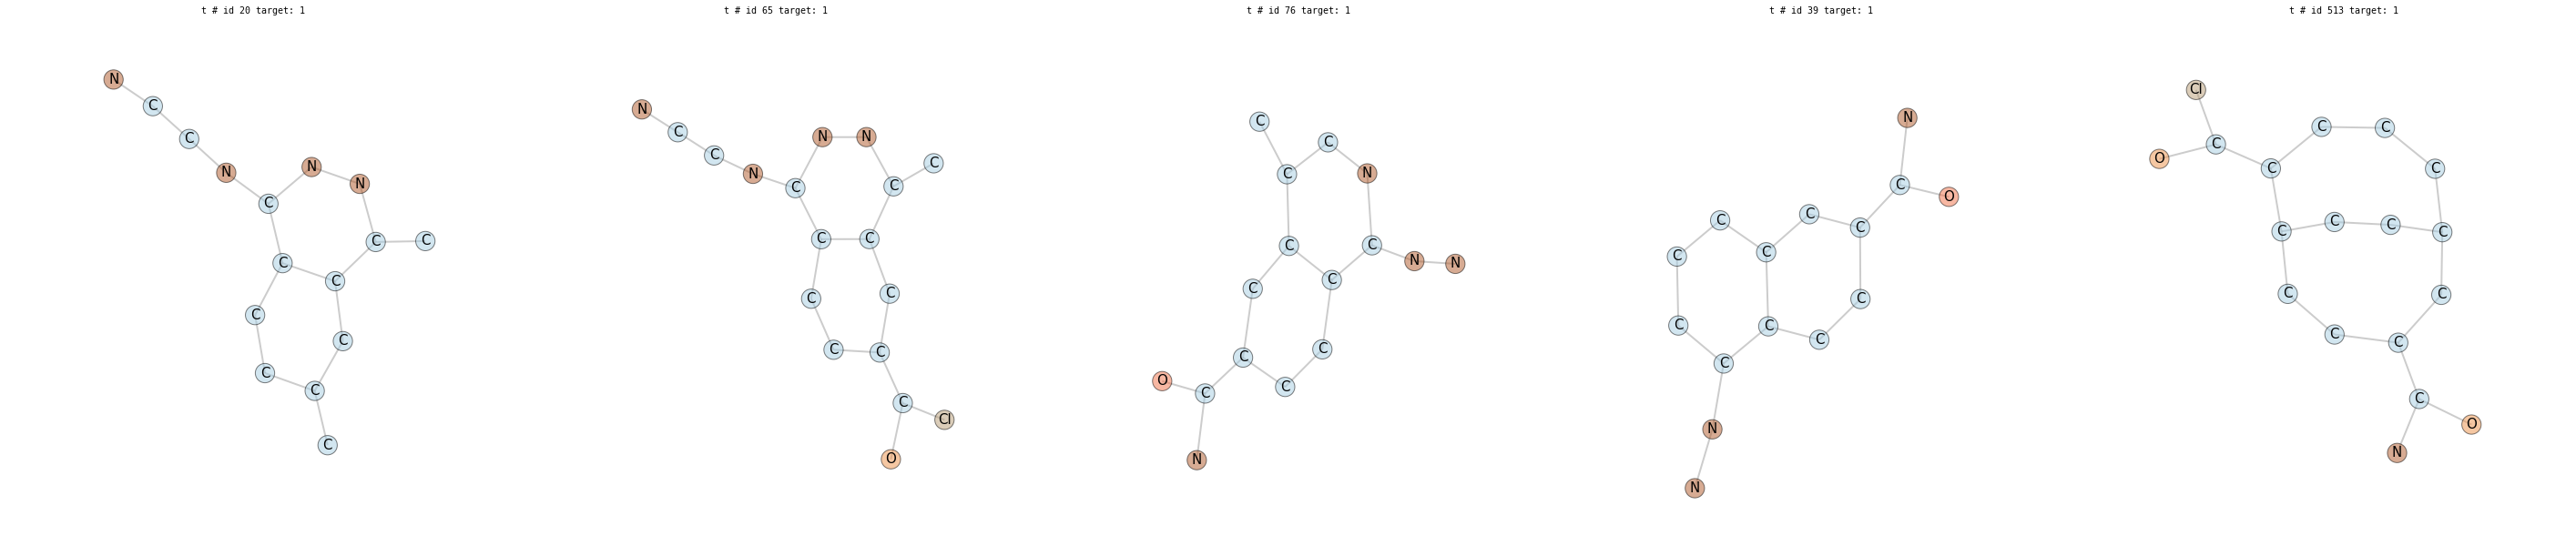

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0 ; size 43
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0 ; size 43
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0 ; size 45
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0 ; size 45
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0 ; size 45
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0 ; size 45
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0 ; size 45
_propose_graph: iteration 7 ; core 0 of 4 ; original_cips tried  0 ; size 45
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0 ; size 45
_propose_graph: iteration 9 ; core 0 of 5 ; original_cips tried  0 ; size 47
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0 ; size 45
_propose_graph: iteration 11 ; core 0 of 5 ; original_cips tried  0 ; size 45
_propose_graph: iteration 12 ; core 0 of 5 ; original_cips tried  0 ; size

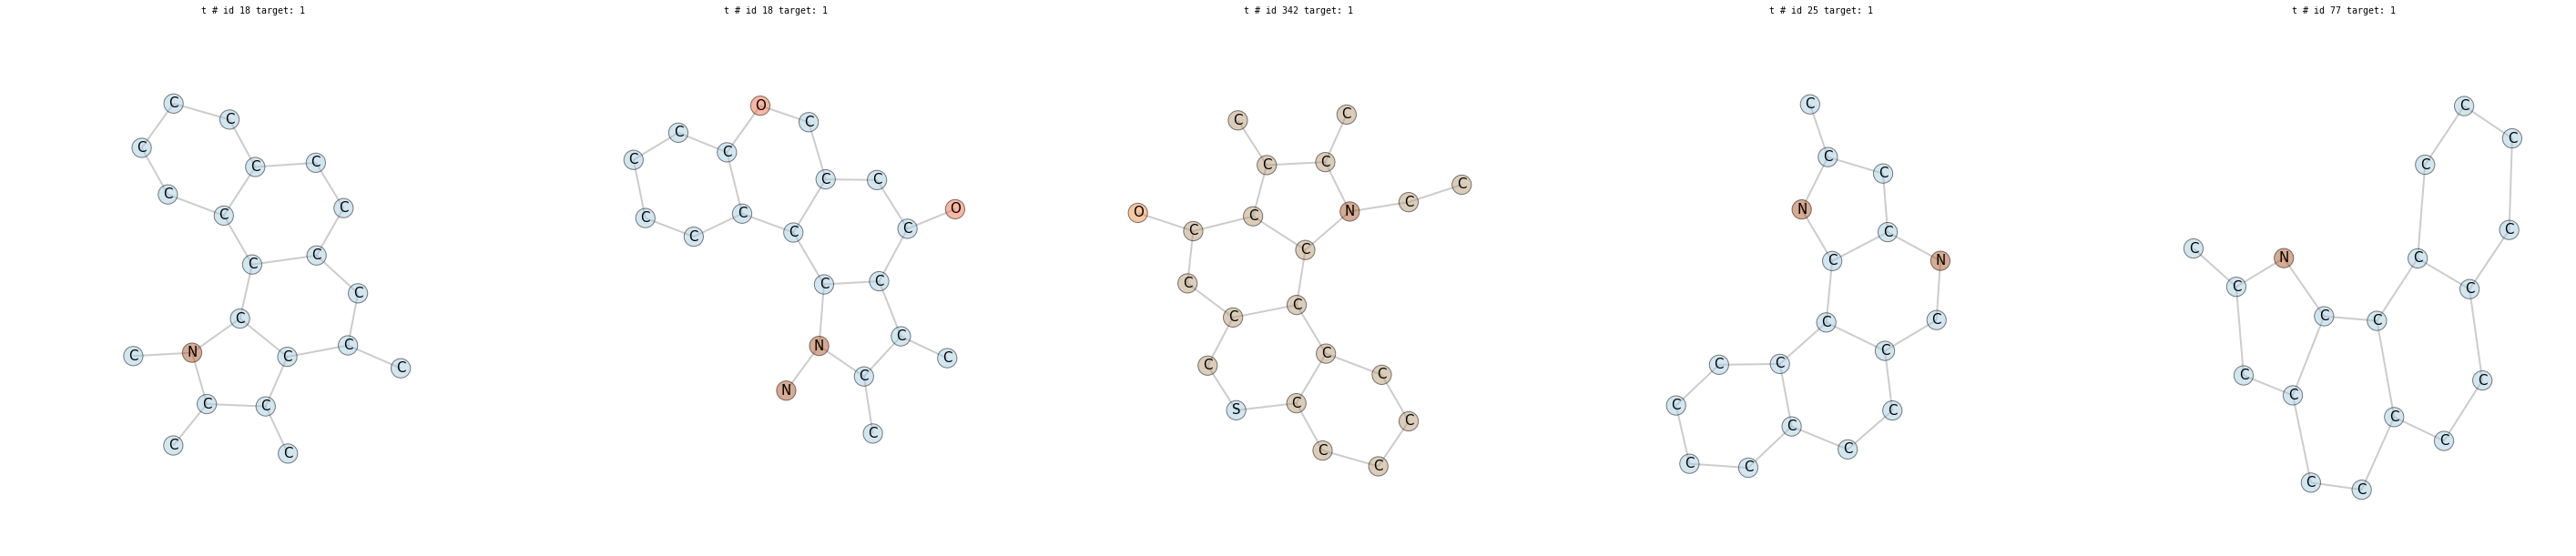

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0 ; size 24
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0 ; size 26
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0 ; size 26
_propose_graph: iteration 3 ; core 0 of 16 ; original_cips tried  0 ; size 26
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0 ; size 24
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0 ; size 24
_propose_graph: iteration 6 ; core 0 of 4 ; original_cips tried  0 ; size 24
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0 ; size 24
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0 ; size 24
_propose_graph: iteration 9 ; core 0 of 16 ; original_cips tried  0 ; size 24
_propose_graph: iteration 10 ; core 0 of 7 ; original_cips tried  0 ; size 18
_propose_graph: iteration 11 ; core 0 of 1 ; original_cips tried  0 ; size 18
_propose_graph: iteration 12 ; core 0 of 4 ; original_cips tried  0 ; si

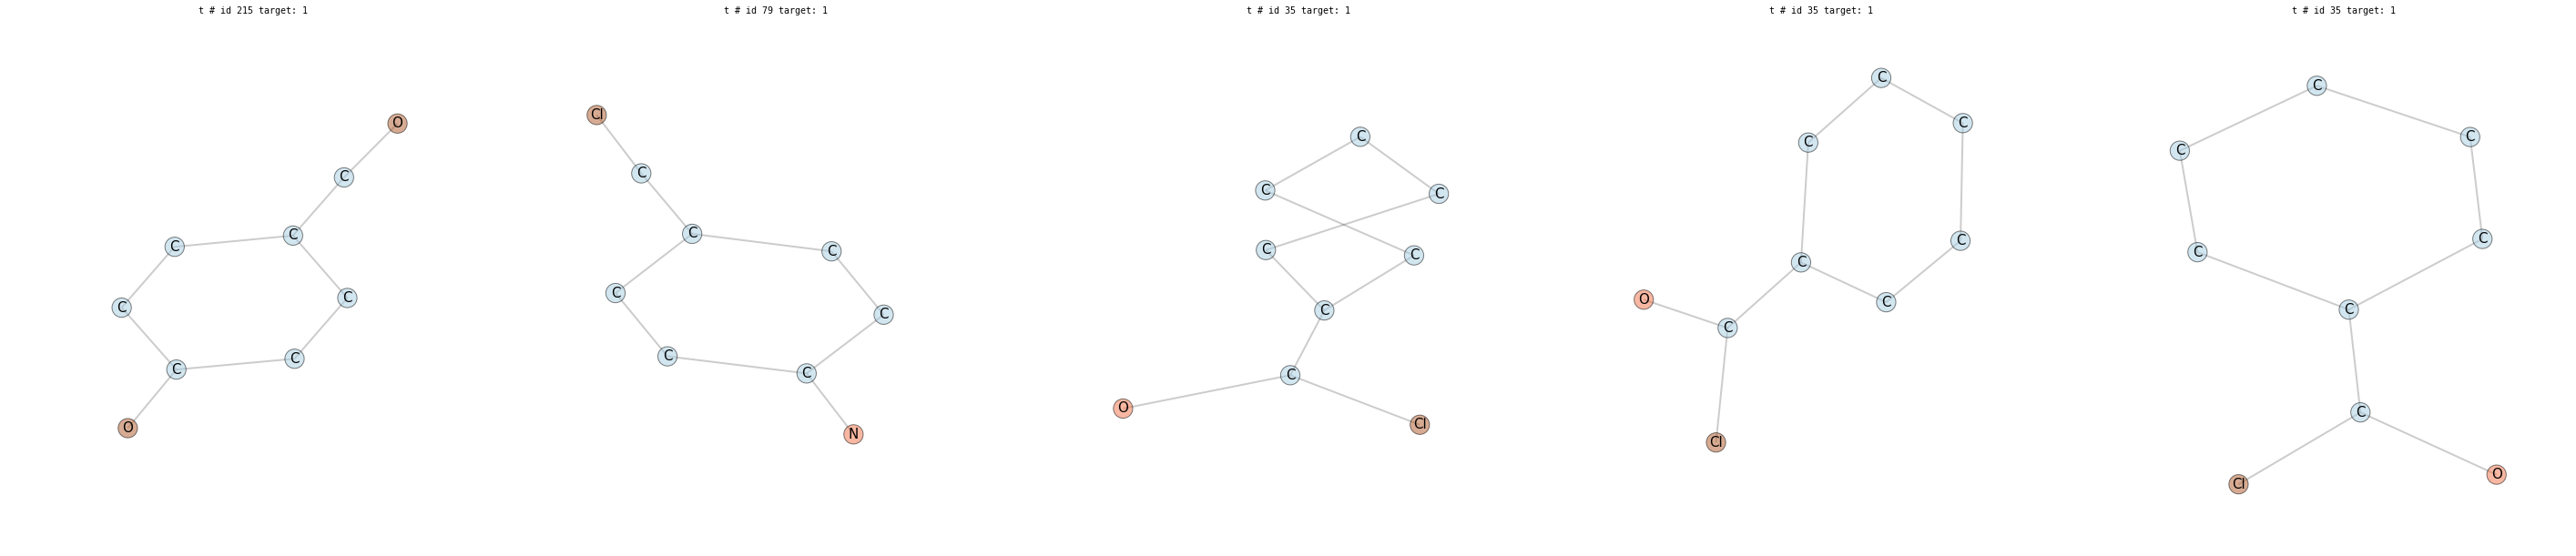

_propose_graph: iteration 0 ; core 0 of 3 ; original_cips tried  0 ; size 35
_propose_graph: iteration 1 ; core 0 of 3 ; original_cips tried  0 ; size 35
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0 ; size 35
_propose_graph: iteration 3 ; core 0 of 5 ; original_cips tried  0 ; size 35
_propose_graph: iteration 4 ; core 0 of 14 ; original_cips tried  0 ; size 37
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0 ; size 35
_propose_graph: iteration 6 ; core 0 of 4 ; original_cips tried  0 ; size 35
_propose_graph: iteration 7 ; core 0 of 14 ; original_cips tried  0 ; size 37
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0 ; size 39
_propose_graph: iteration 9 ; core 0 of 1 ; original_cips tried  0 ; size 39
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0 ; size 37
_propose_graph: iteration 11 ; core 0 of 2 ; original_cips tried  0 ; size 37
_propose_graph: iteration 12 ; core 0 of 2 ; original_cips tried  0 ; si

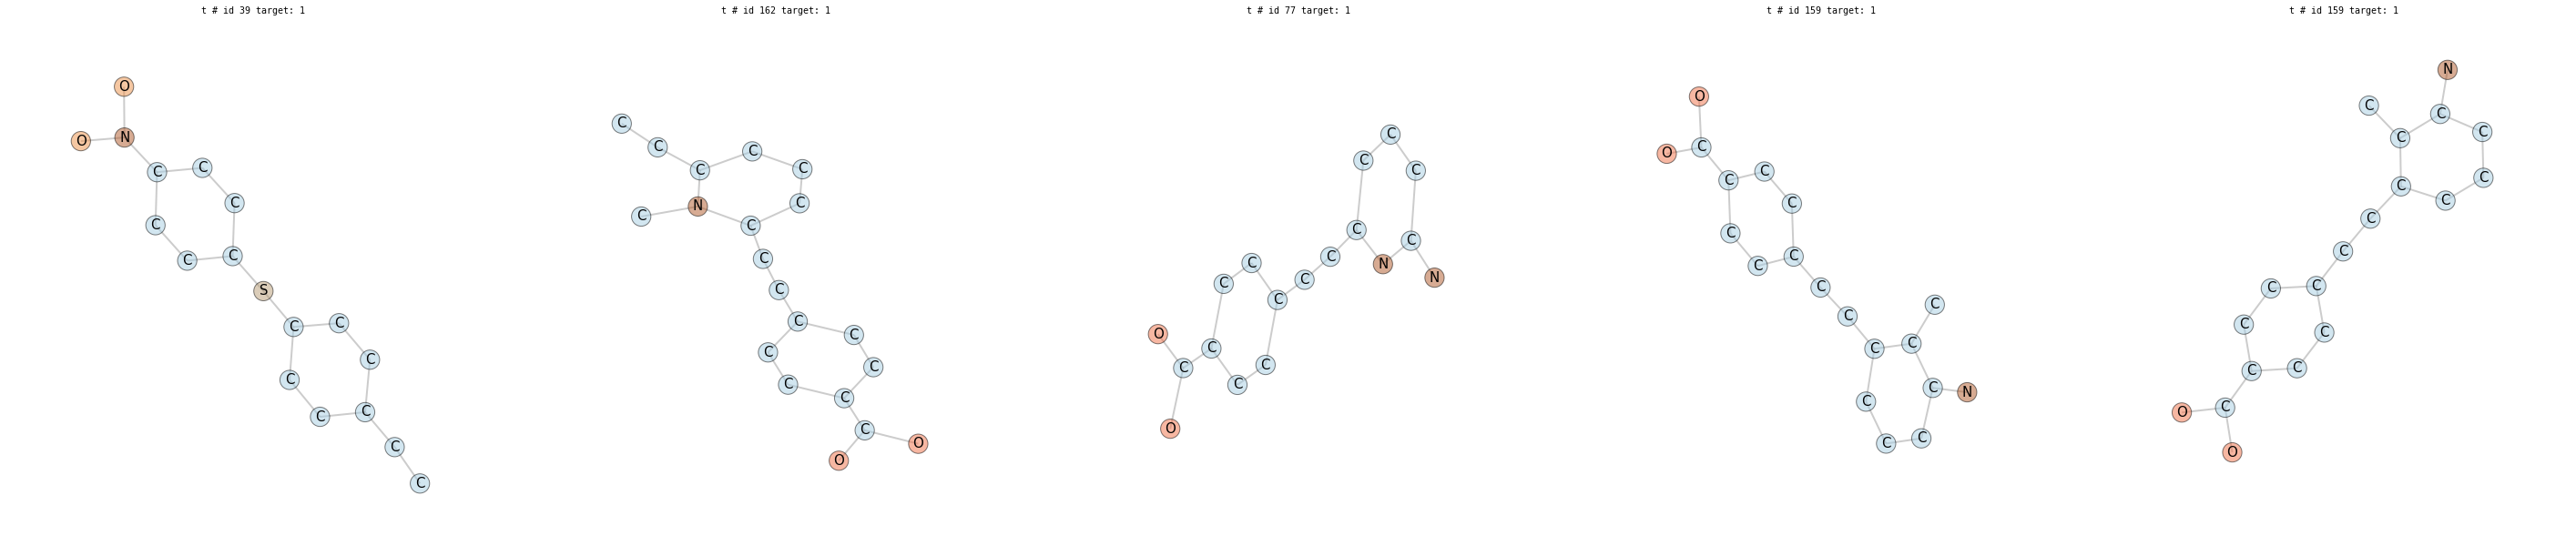

_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0 ; size 43
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0 ; size 43
_propose_graph: iteration 2 ; core 0 of 5 ; original_cips tried  0 ; size 43
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0 ; size 43
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0 ; size 43
_propose_graph: iteration 5 ; core 0 of 14 ; original_cips tried  0 ; size 43
_propose_graph: iteration 6 ; core 0 of 14 ; original_cips tried  0 ; size 37
_propose_graph: iteration 7 ; core 0 of 7 ; original_cips tried  0 ; size 37
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0 ; size 39
_propose_graph: iteration 9 ; core 0 of 14 ; original_cips tried  0 ; size 43
_propose_graph: iteration 10 ; core 0 of 14 ; original_cips tried  0 ; size 43
_propose_graph: iteration 11 ; core 0 of 7 ; original_cips tried  0 ; size 43
_propose_graph: iteration 12 ; core 0 of 1 ; original_cips tried  0 ; 

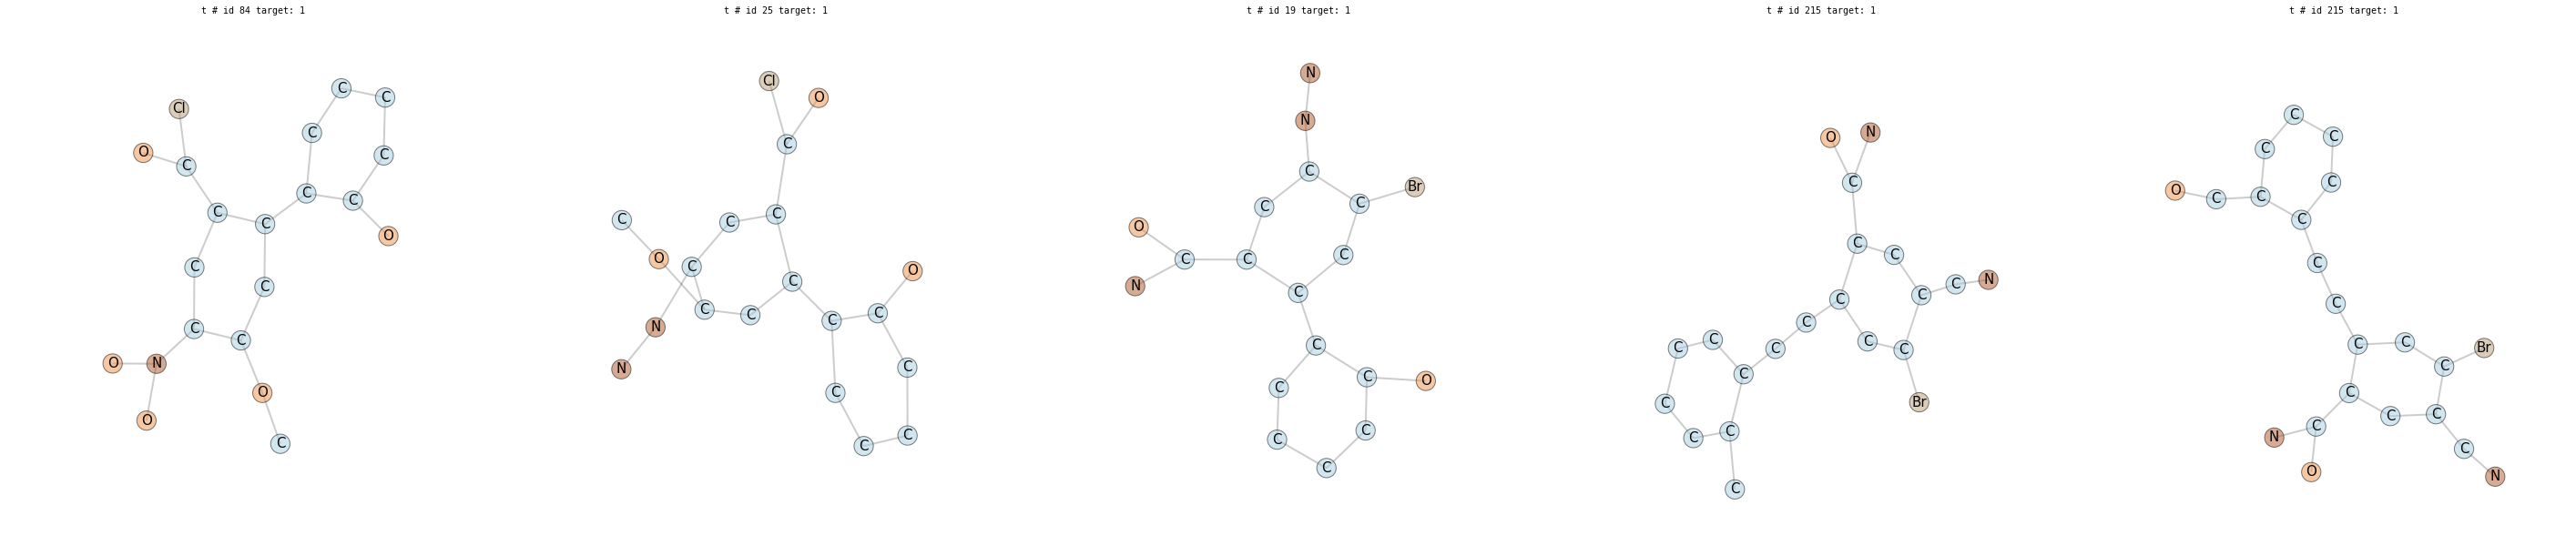

_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0 ; size 22
_propose_graph: iteration 1 ; core 0 of 16 ; original_cips tried  0 ; size 22
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0 ; size 20
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0 ; size 20
_propose_graph: iteration 4 ; core 0 of 16 ; original_cips tried  0 ; size 20
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0 ; size 22
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0 ; size 22
_propose_graph: iteration 7 ; core 0 of 14 ; original_cips tried  0 ; size 20
_propose_graph: iteration 8 ; core 0 of 16 ; original_cips tried  0 ; size 20
_propose_graph: iteration 9 ; core 0 of 16 ; original_cips tried  0 ; size 18
_propose_graph: iteration 10 ; core 0 of 7 ; original_cips tried  0 ; size 18
_propose_graph: iteration 11 ; core 0 of 14 ; original_cips tried  0 ; size 18
_propose_graph: iteration 12 ; core 0 of 7 ; original_cips tried  0 

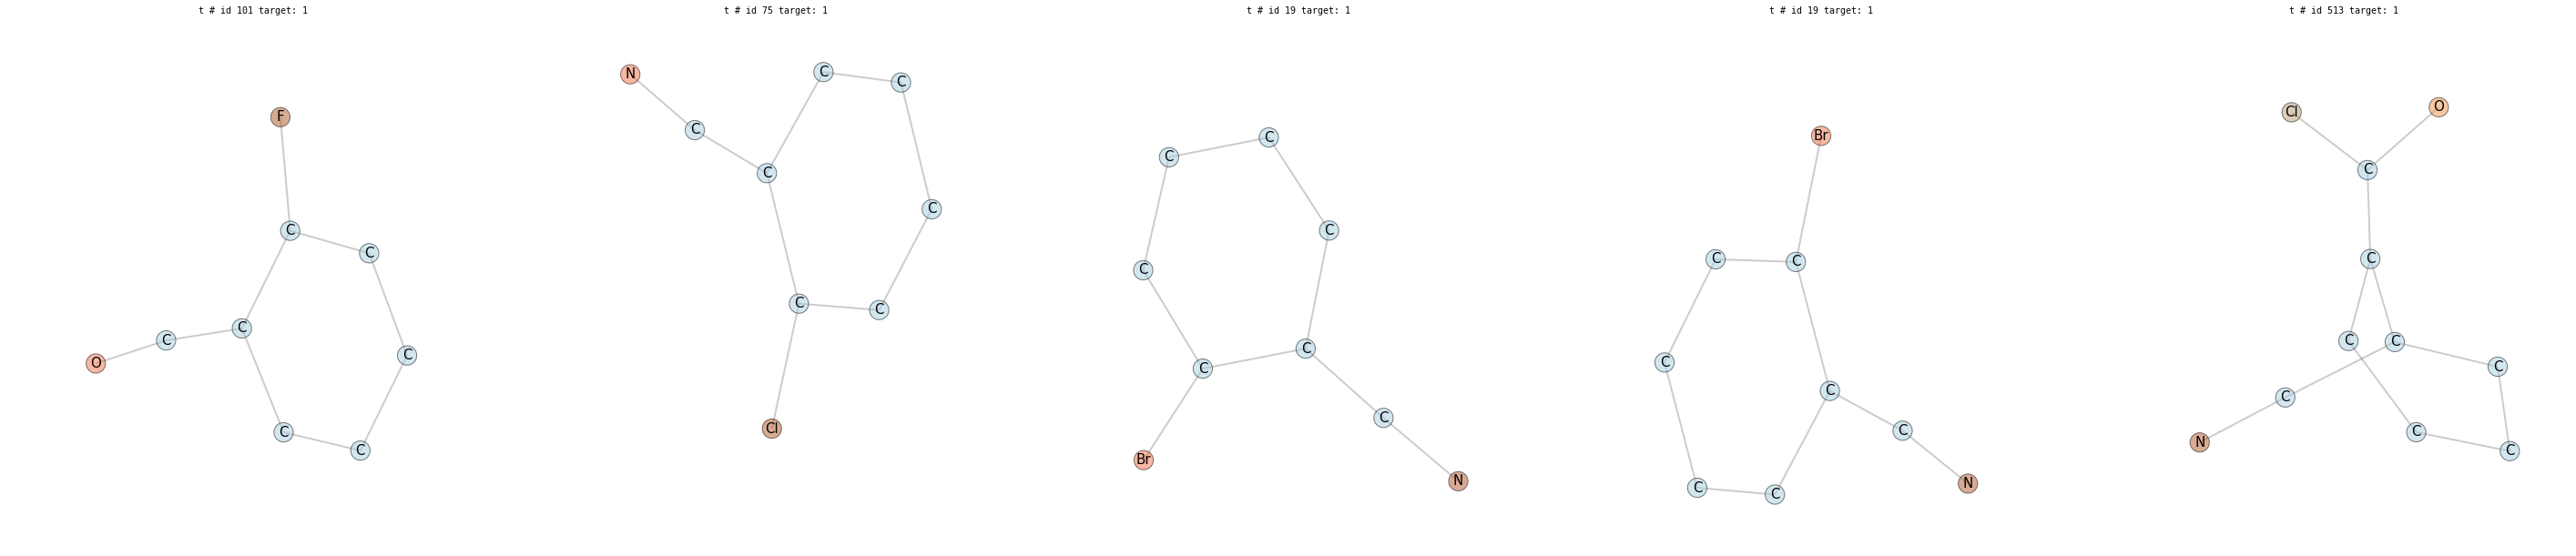

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0 ; size 39
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0 ; size 39
_propose_graph: iteration 2 ; core 0 of 4 ; original_cips tried  0 ; size 39
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0 ; size 39
_propose_graph: iteration 4 ; core 0 of 4 ; original_cips tried  0 ; size 41
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0 ; size 41
_propose_graph: iteration 6 ; core 0 of 2 ; original_cips tried  0 ; size 45
_propose_graph: iteration 7 ; core 0 of 7 ; original_cips tried  0 ; size 47
_propose_graph: iteration 8 ; core 0 of 16 ; original_cips tried  0 ; size 51
_propose_graph: iteration 9 ; core 0 of 7 ; original_cips tried  0 ; size 51
_propose_graph: iteration 10 ; core 0 of 5 ; original_cips tried  0 ; size 49
_propose_graph: iteration 11 ; core 0 of 7 ; original_cips tried  0 ; size 49
_propose_graph: iteration 12 ; core 0 of 7 ; original_cips tried  0 ; siz

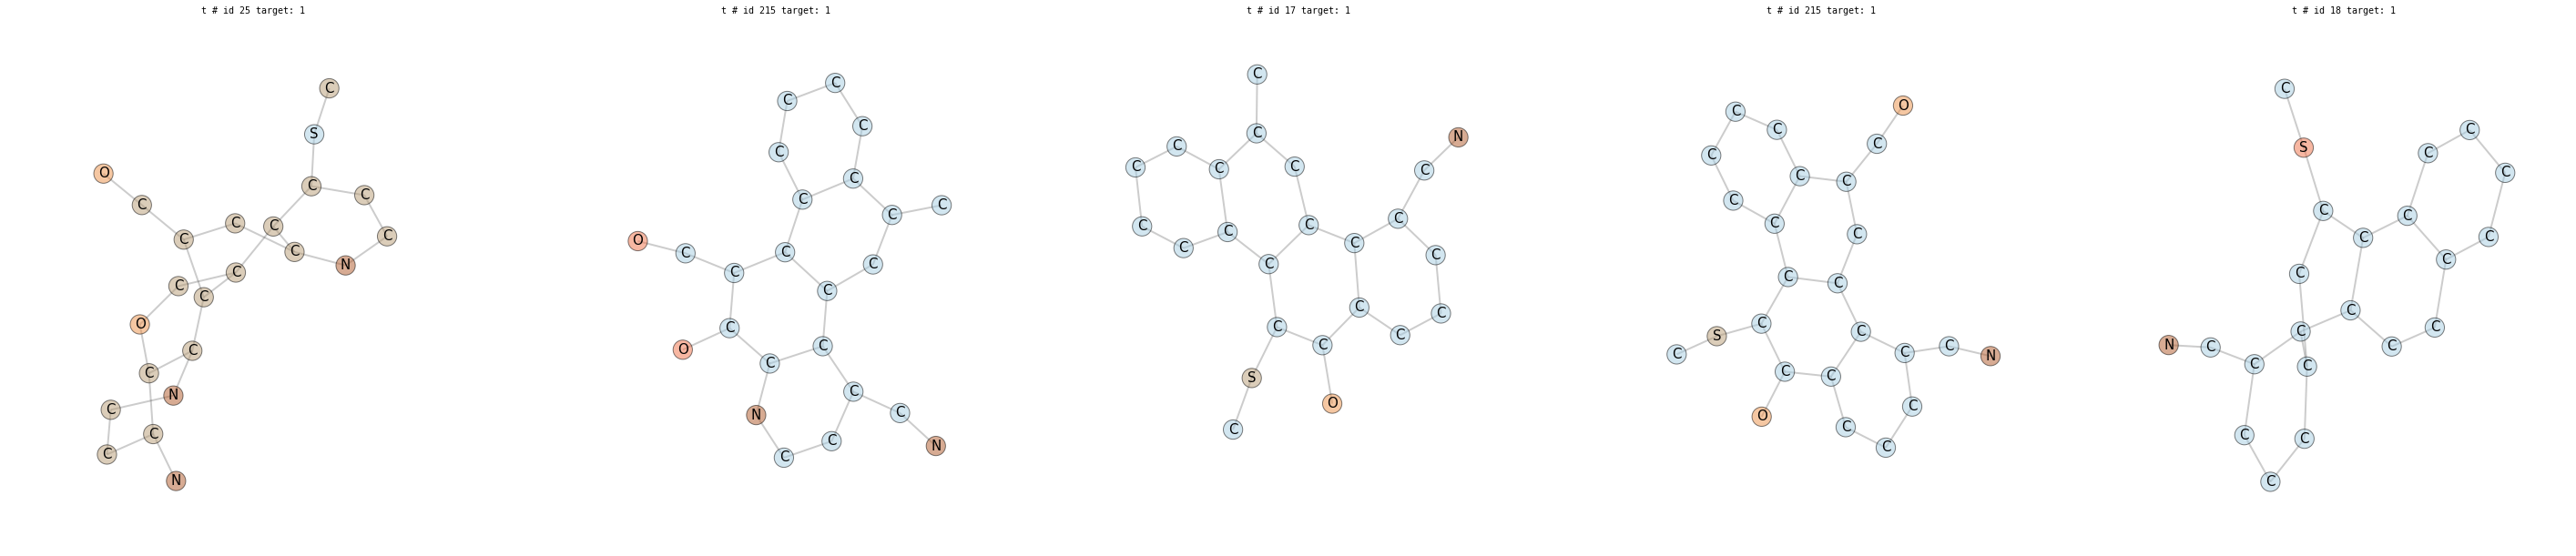

_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0 ; size 52
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0 ; size 54
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0 ; size 50
_propose_graph: iteration 3 ; core 0 of 14 ; original_cips tried  0 ; size 56
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0 ; size 60
_propose_graph: iteration 5 ; core 0 of 5 ; original_cips tried  0 ; size 60
_propose_graph: iteration 6 ; core 0 of 16 ; original_cips tried  0 ; size 60
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0 ; size 60
_propose_graph: iteration 8 ; core 0 of 16 ; original_cips tried  0 ; size 64
_propose_graph: iteration 9 ; core 0 of 16 ; original_cips tried  0 ; size 62
_propose_graph: iteration 10 ; core 0 of 16 ; original_cips tried  0 ; size 64
_propose_graph: iteration 11 ; core 0 of 7 ; original_cips tried  0 ; size 66
_propose_graph: iteration 12 ; core 0 of 2 ; original_cips tried  0 ;

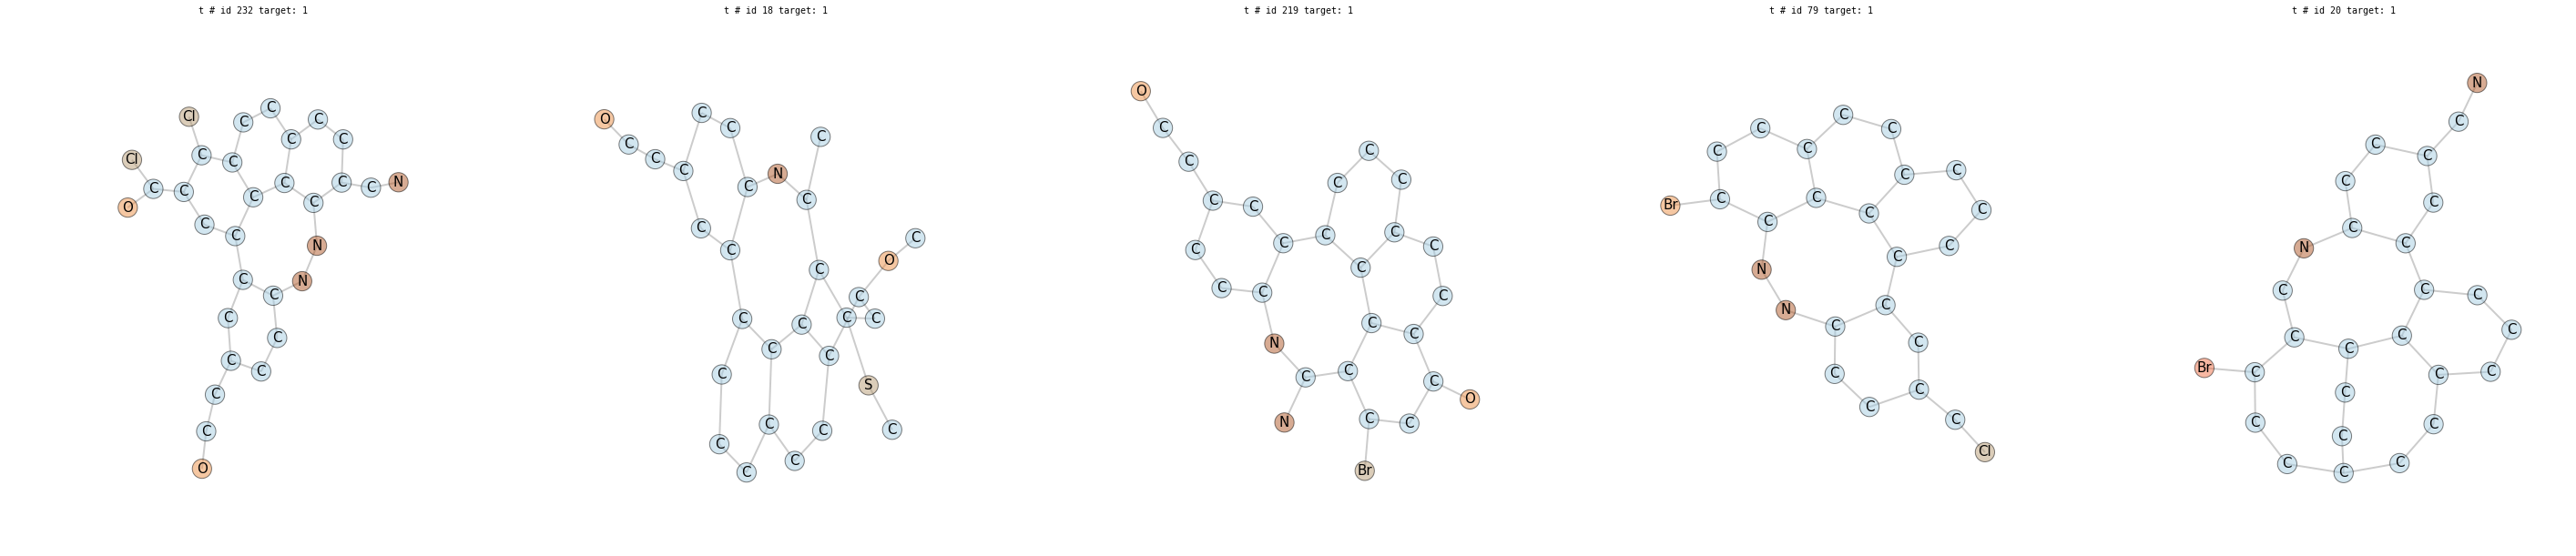

_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0 ; size 107
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0 ; size 107
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0 ; size 101
_propose_graph: iteration 3 ; core 0 of 16 ; original_cips tried  0 ; size 105
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0 ; size 103
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0 ; size 95
_propose_graph: iteration 6 ; core 0 of 2 ; original_cips tried  0 ; size 97
_propose_graph: iteration 7 ; core 0 of 5 ; original_cips tried  0 ; size 99
_propose_graph: iteration 8 ; core 0 of 16 ; original_cips tried  0 ; size 103
_propose_graph: iteration 9 ; core 0 of 1 ; original_cips tried  0 ; size 103
_propose_graph: iteration 10 ; core 0 of 16 ; original_cips tried  0 ; size 101
_propose_graph: iteration 11 ; core 0 of 14 ; original_cips tried  0 ; size 101
_propose_graph: iteration 12 ; core 0 of 1 ; original_cips tr

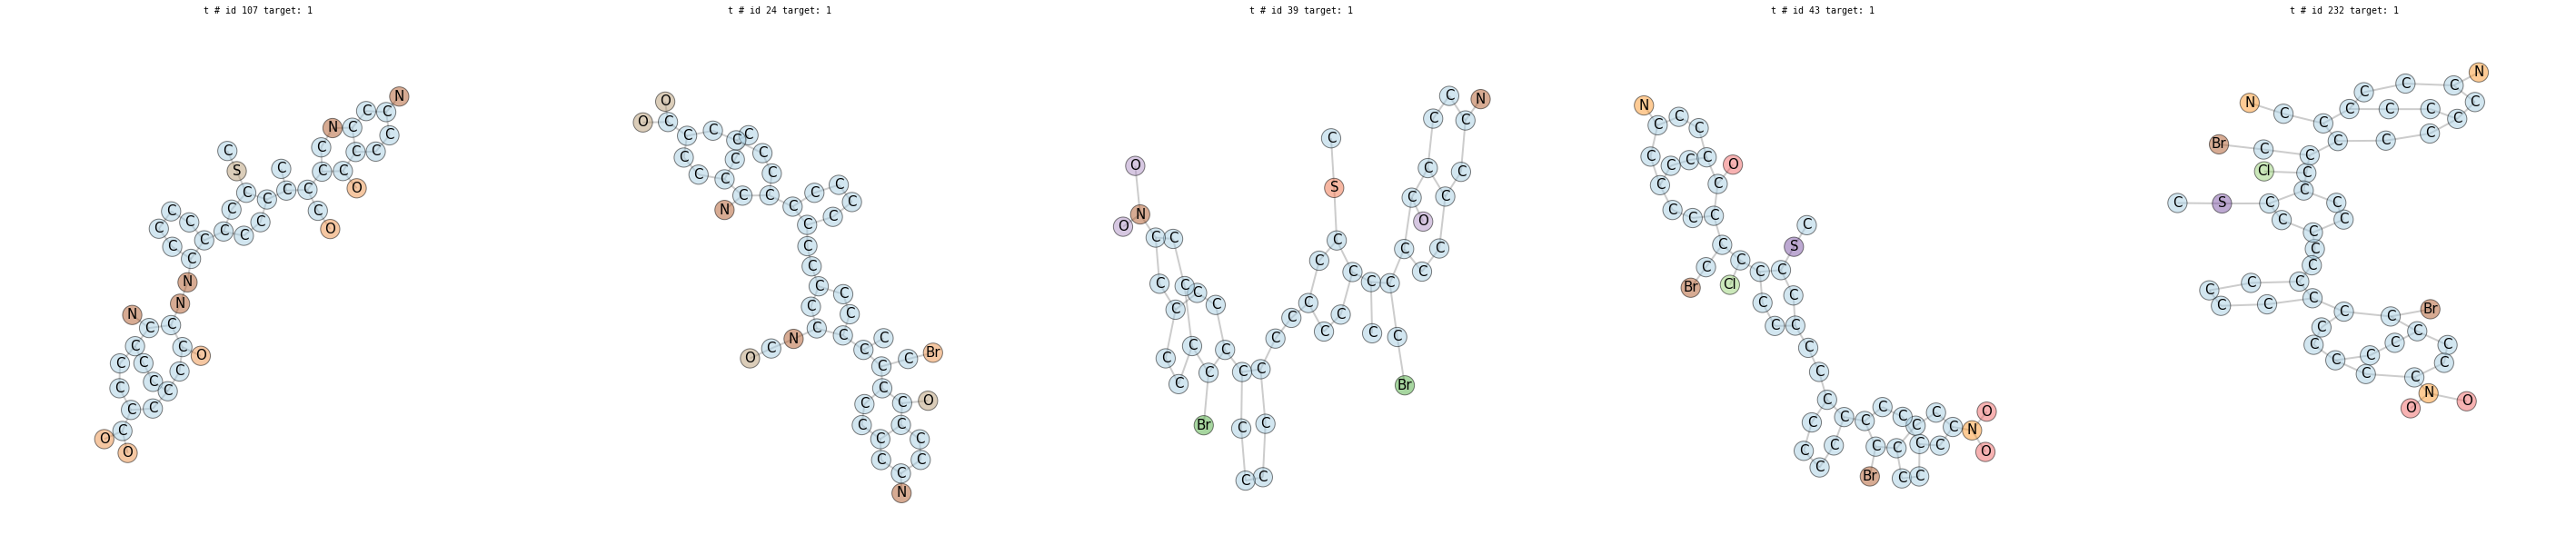

_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0 ; size 32
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0 ; size 34
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0 ; size 34
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0 ; size 34
_propose_graph: iteration 4 ; core 0 of 1 ; original_cips tried  0 ; size 34
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0 ; size 34
_propose_graph: iteration 6 ; core 0 of 4 ; original_cips tried  0 ; size 36
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0 ; size 36
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0 ; size 36
_propose_graph: iteration 9 ; core 0 of 1 ; original_cips tried  0 ; size 28
_propose_graph: iteration 10 ; core 0 of 14 ; original_cips tried  0 ; size 28
_propose_graph: iteration 11 ; core 0 of 4 ; original_cips tried  0 ; size 28
_propose_graph: iteration 12 ; core 0 of 1 ; original_cips tried  0 ; siz

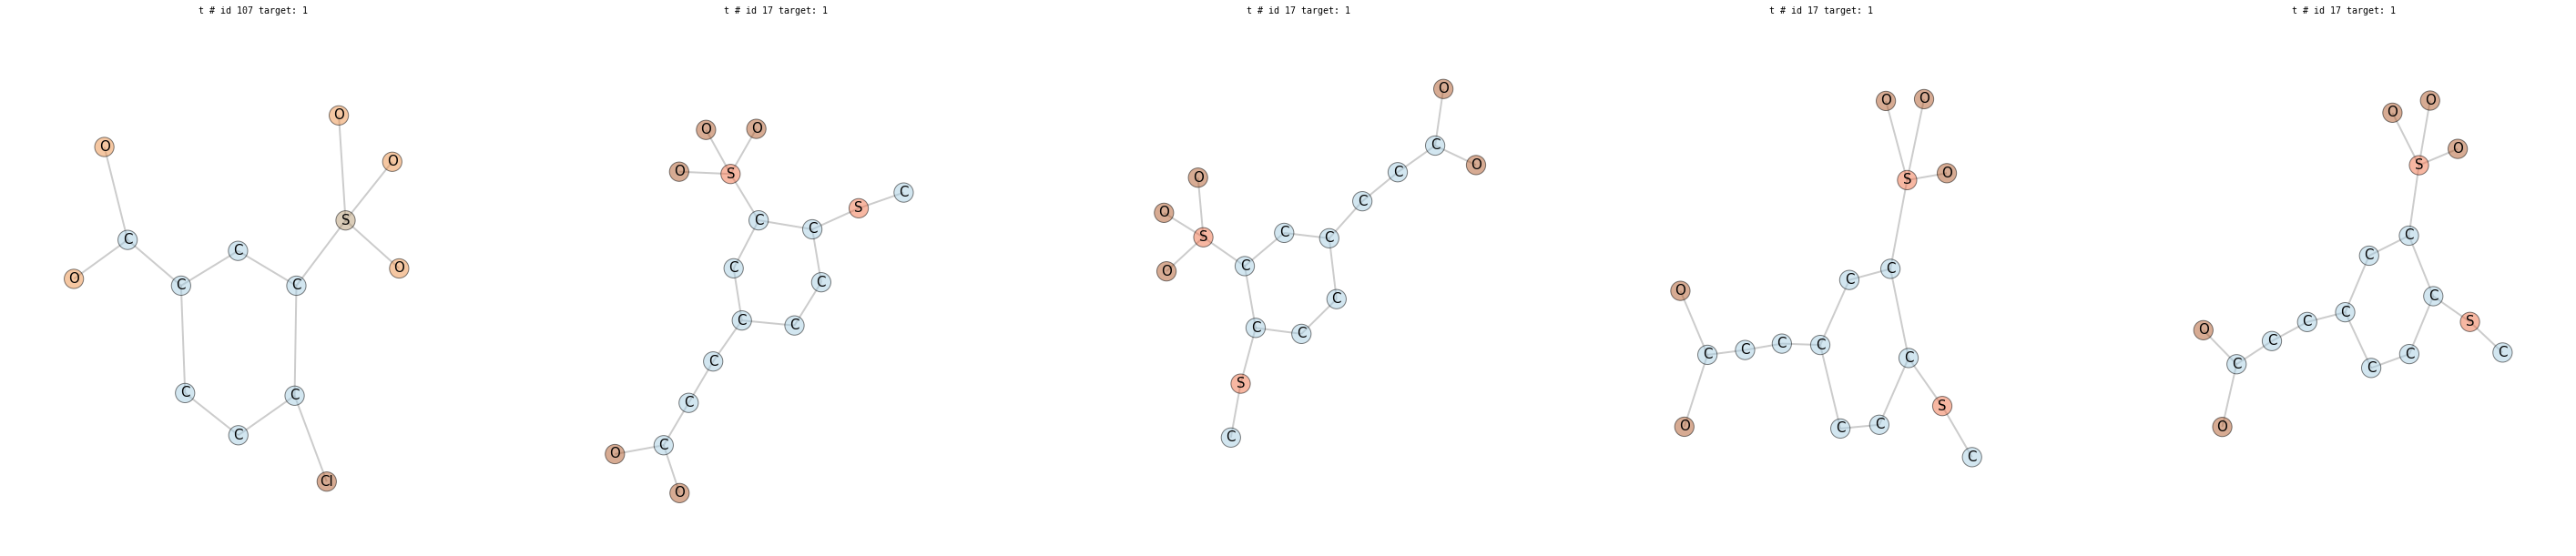

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0 ; size 38
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0 ; size 40
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0 ; size 42
_propose_graph: iteration 3 ; core 0 of 16 ; original_cips tried  0 ; size 42
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0 ; size 42
_propose_graph: iteration 5 ; core 0 of 5 ; original_cips tried  0 ; size 38
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0 ; size 40
_propose_graph: iteration 7 ; core 0 of 14 ; original_cips tried  0 ; size 38
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0 ; size 38
_propose_graph: iteration 9 ; core 0 of 5 ; original_cips tried  0 ; size 38
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0 ; size 36
_propose_graph: iteration 11 ; core 0 of 1 ; original_cips tried  0 ; size 34
_propose_graph: iteration 12 ; core 0 of 14 ; original_cips tried  0 ; s

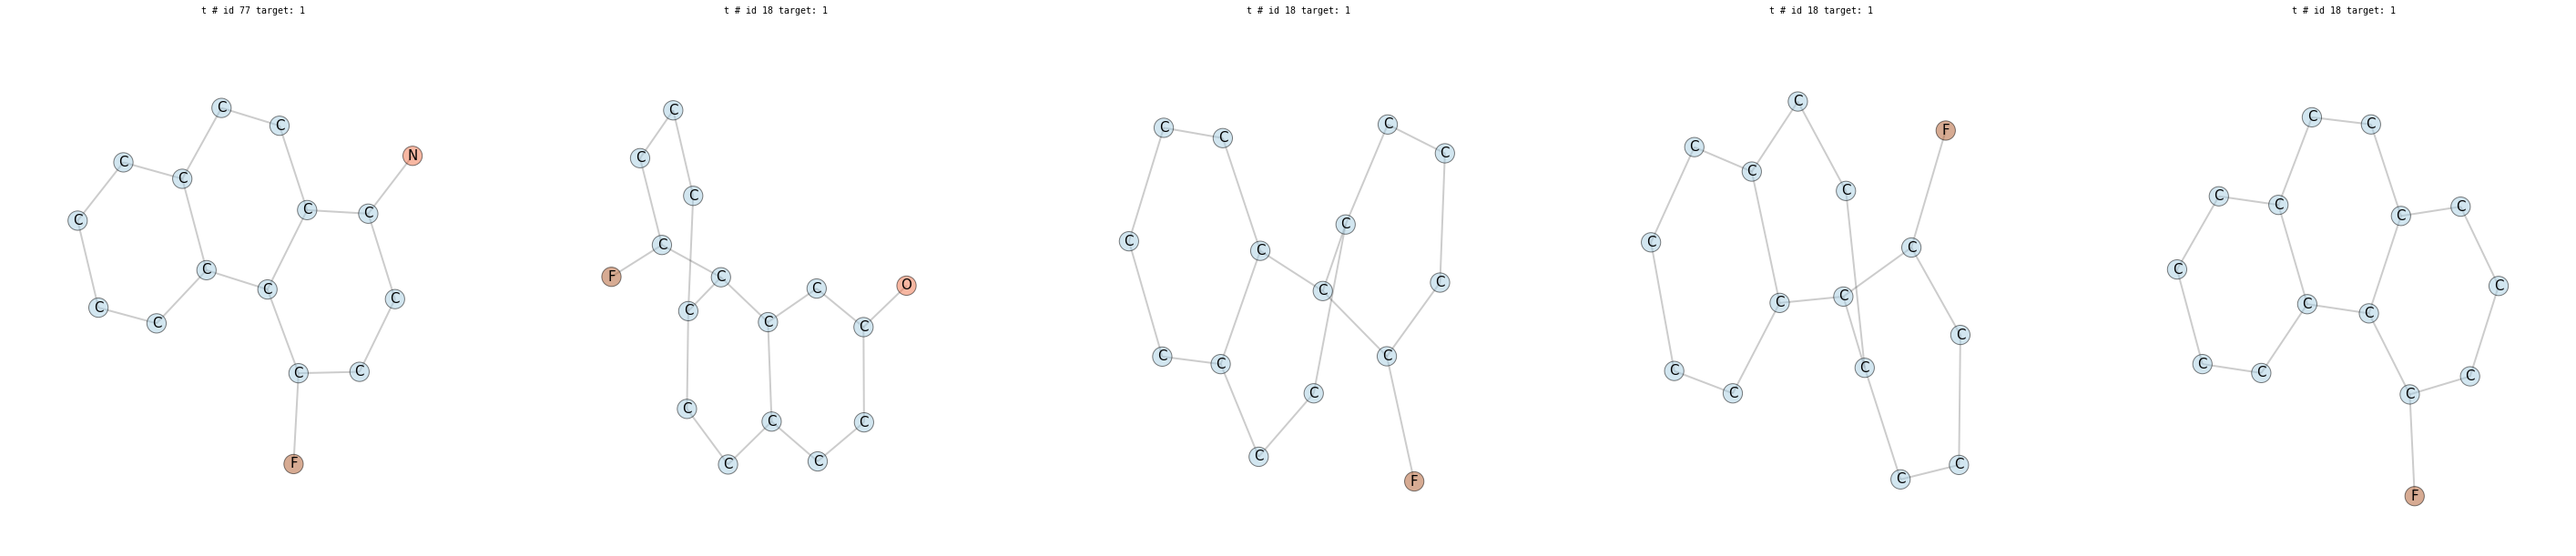

_propose_graph: iteration 0 ; core 0 of 5 ; original_cips tried  0 ; size 45
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0 ; size 43
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0 ; size 45
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0 ; size 45
_propose_graph: iteration 4 ; core 0 of 16 ; original_cips tried  0 ; size 47
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0 ; size 47
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0 ; size 47
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0 ; size 51
_propose_graph: iteration 8 ; core 0 of 5 ; original_cips tried  0 ; size 49
_propose_graph: iteration 9 ; core 0 of 7 ; original_cips tried  0 ; size 49
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0 ; size 49
_propose_graph: iteration 11 ; core 0 of 16 ; original_cips tried  0 ; size 47
_propose_graph: iteration 12 ; core 0 of 2 ; original_cips tried  0 ; si

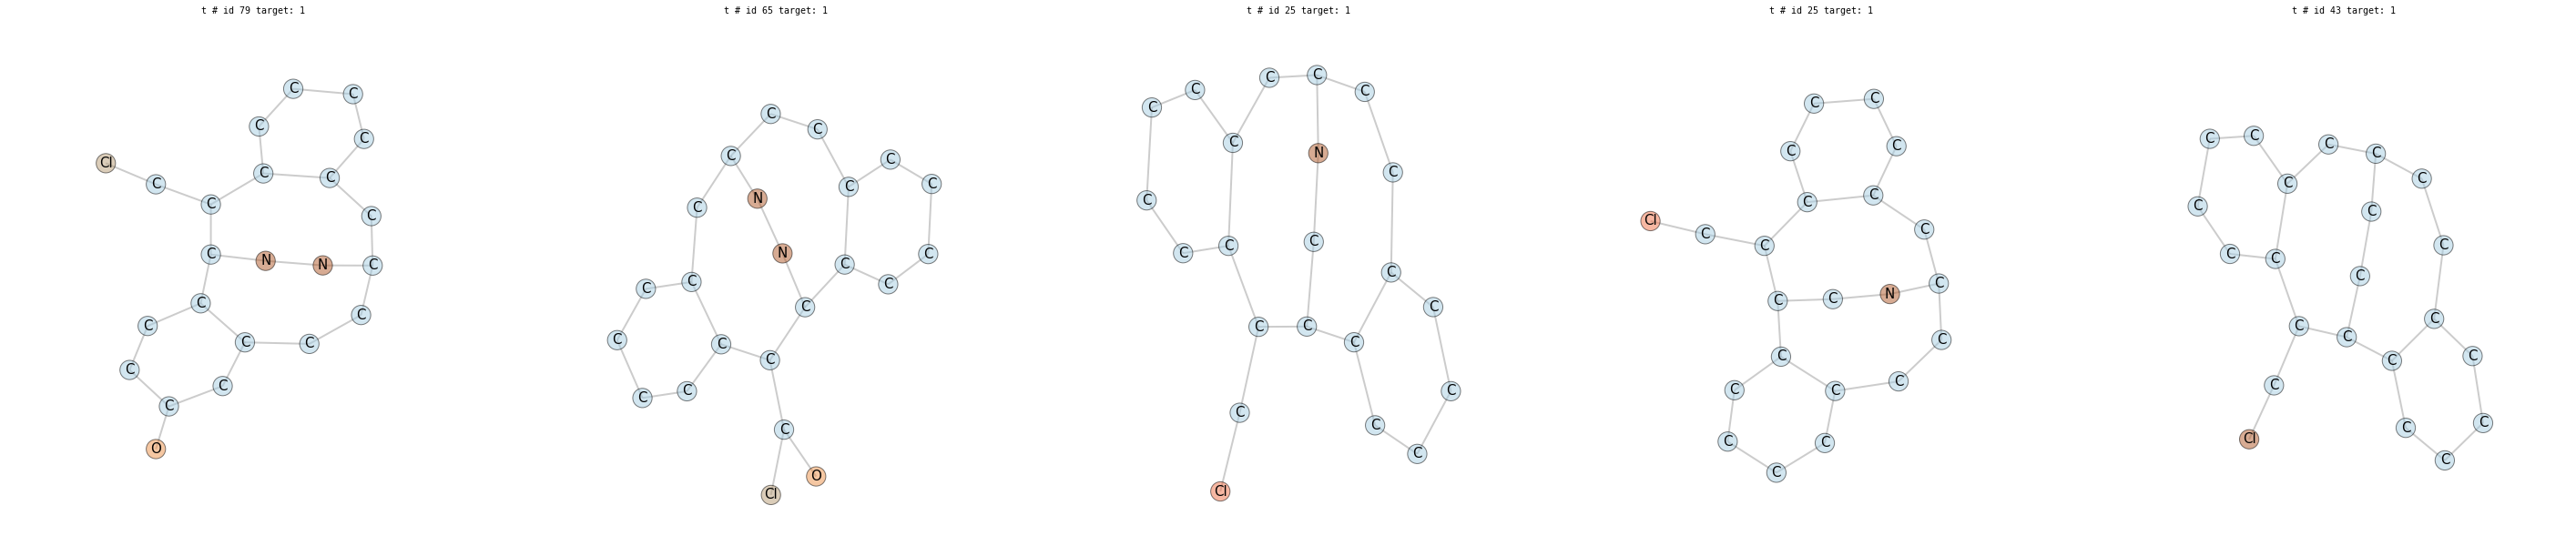

CPU times: user 23.5 s, sys: 864 ms, total: 24.4 s
Wall time: 25.7 s


In [16]:
%%time
# plot examples of sampling paths

scores=[]
ids=range(id_start,id_end)
for i,graphlist in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(sampler.monitors[i].sampling_info['score_history'])
    if BABELDRAW:
        from graphlearn.utils import openbabel
        openbabel.draw(graphlist, d3=False, n_graphs_per_line=6,size=200)
    else:
        from graphlearn.utils import draw
        draw.graphlearn(graphlist,contract=True,#vertex_label='id',
                   n_graphs_per_line=6, size=10, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=450)
    
 
    

In [17]:
# we sampled with monitoring mode enabled, 
#this is why we could now look at what exactly happened during sampling
#this is step 9 of the 1st graph
sampler.monitors[1][9]

{'accepted:': [True],
 'debug': ['debuglevel:5 accept_orig_cip: True True',
  'debuglevel:10 _propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0 ; size 45'],
 'graphwrapper': <graphlearn.decompose.Decomposer at 0x7f2a3bddb7d0>,
 'id': 9,
 'score': [0.34703589740391633],
 'substitution': ['root: 13 , newcip: 328666 / 229736']}

# Show sample score history

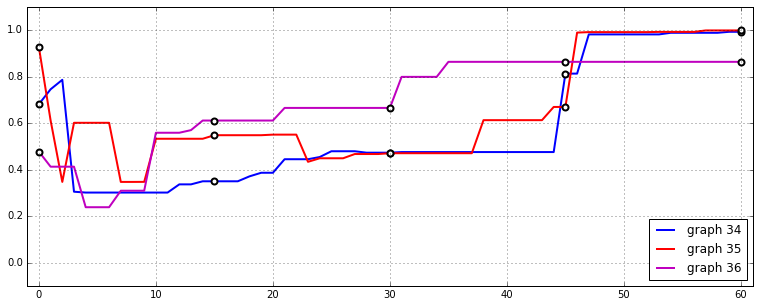

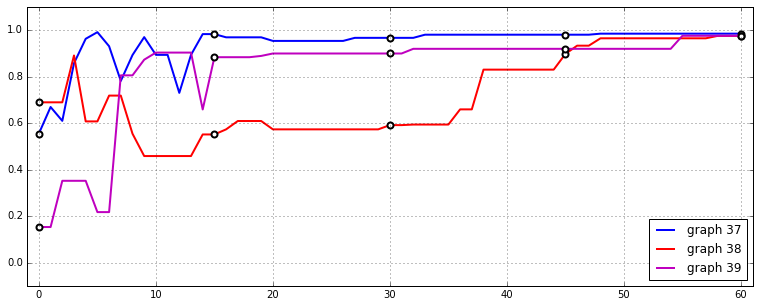

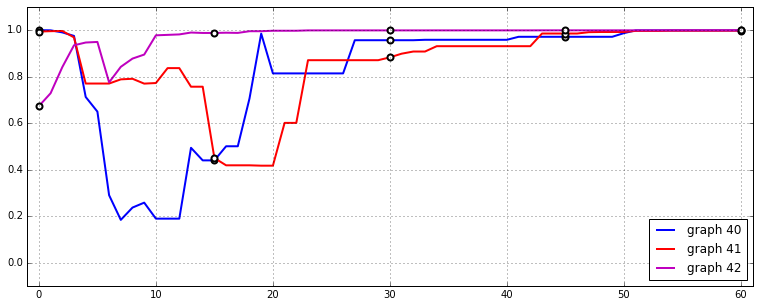

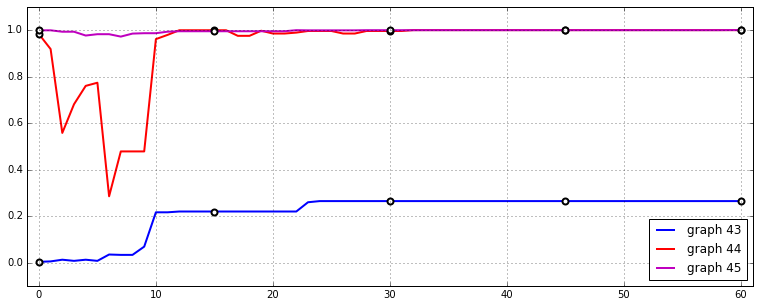

CPU times: user 588 ms, sys: 0 ns, total: 588 ms
Wall time: 586 ms


In [18]:
%%time
# plot sampling path score
from itertools import islice
import numpy as np
import pylab as plt
markevery=n_steps/(n_samples)
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):

    plt.figure(figsize=(13,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
     
        data = list(islice(score,None, None, step))
        plt.plot(data, linewidth=2, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        plt.plot(data, linestyle='None',markevery=markevery, markerfacecolor='white', marker='o', markeredgewidth=2,markersize=6)
    plt.legend(loc='lower right')
    plt.grid()
    plt.xlim(-1,n_steps+1)
    plt.ylim(-0.1,1.1)
    plt.show()

---

In [19]:
from matplotlib.cm import inferno
colors = inferno(range(256))
print colors
import matplotlib
for x in colors:
    print matplotlib.colors.rgb2hex(x)

[[  1.46200000e-03   4.66000000e-04   1.38660000e-02   1.00000000e+00]
 [  2.26700000e-03   1.27000000e-03   1.85700000e-02   1.00000000e+00]
 [  3.29900000e-03   2.24900000e-03   2.42390000e-02   1.00000000e+00]
 ..., 
 [  9.76511000e-01   9.89753000e-01   6.16760000e-01   1.00000000e+00]
 [  9.82257000e-01   9.94109000e-01   6.31017000e-01   1.00000000e+00]
 [  9.88362000e-01   9.98364000e-01   6.44924000e-01   1.00000000e+00]]
#000004
#010005
#010106
#010108
#02010a
#02020c
#02020e
#030210
#040312
#040314
#050417
#060419
#07051b
#08051d
#09061f
#0a0722
#0b0724
#0c0826
#0d0829
#0e092b
#10092d
#110a30
#120a32
#140b34
#150b37
#160b39
#180c3c
#190c3e
#1b0c41
#1c0c43
#1e0c45
#1f0c48
#210c4a
#230c4c
#240c4f
#260c51
#280b53
#290b55
#2b0b57
#2d0b59
#2f0a5b
#310a5c
#320a5e
#340a5f
#360961
#380962
#390963
#3b0964
#3d0965
#3e0966
#400a67
#420a68
#440a68
#450a69
#470b6a
#490b6a
#4a0c6b
#4c0c6b
#4d0d6c
#4f0d6c
#510e6c
#520e6d
#540f6d
#550f6d
#57106e
#59106e
#5a116e
#5c126e
#5d126e
#5f136e
#61136

In [ ]:
z=Namespace(decomposergen='asd', estimator=4)